In [1]:
#CAR PRICE PREDICTION WITH MACHINE LEARNING

# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

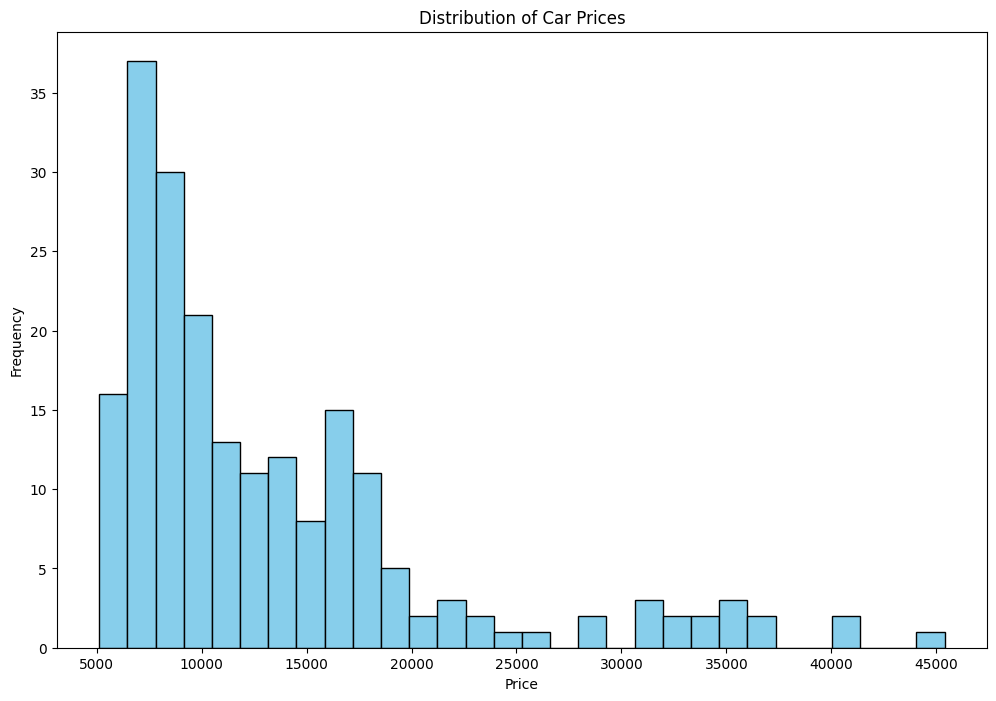

ValueError: could not convert string to float: 'alfa-romero giulia'

<Figure size 1800x1200 with 0 Axes>

In [2]:
#Load the Data:

classify=pd.read_csv("Car_details.csv")
print(classify.info(),"\n")

# Let's check the first 5 entries of the dataset
print(classify.head(),"\n")

# Let's check how many rows and columns are there
print("(rows,columns) = ",classify.shape,"\n")

#Preprocessing and Data Cleaning

# Lets check whether the dataset have any null values
print(classify.isnull().sum(),"\n")

# lets check whether the data have any duplicate data, if there any we delete them
print("Number of duplicates : ",classify.duplicated().sum(),"\n")

# We will drop the car_ID as it has no significance for our model
classify.drop('car_ID',axis=1,inplace=True)

classify.dropna(inplace=True) # also drop the missing values

# Create the car_company variable
classify['car_company'] = classify['CarName'].apply(lambda x: x.split(" ")[0])

#Visualizing the data

# As we can see there are no null values and duplicates in the data.
# Now, lets check about the statistical information about the data
print(classify.describe(),"\n")

print("The price column is the target column and remaining all columns are independent variables.\n")

# lets check how the price cloumn is distributed through the dataset
plt.figure(figsize=(12, 8))
plt.hist(classify['price'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Now, lets look at the heatmap of correlation of the data with numerical variables.
plt.figure(figsize=(18,12))
corr=classify.corr()
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()

print("If we check the heatmap, we can say that the price of car is highly correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower, these attributes are also highly dependent on each other. which are offcourse will increase the price of the car and the price is negatively correlated to cithmpg and highwaympg means that car with high mileage will be affordable to middle class, that's why the price is low for them.")

#Feature selection and Engineering

X = classify.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength','carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber','enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg',
'car_company']]
y = classify['price']

# lets do label encoding for categorical variables
categorical = X.select_dtypes(include=['object'])
dummies = pd.get_dummies(categorical, drop_first=True)
X = X.drop(list(categorical.columns), axis=1)
X = pd.concat([X,dummies], axis=1)

# scaling the features
from sklearn.preprocessing import scale
dat = X.columns
X = pd.DataFrame(scale(X))
X.columns = dat
print(X.columns,"\n")

#Model Selection and Training

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#For better model , I am using xgboot regressor
from xgboost import XGBRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Initialize and train the XGBoost model
model = XGBRegressor(random_state=42)

# Perform recursive feature elimination with cross-validation
rfecv = RFECV(estimator=model)
X_train_selected = rfecv.fit_transform(X_train, y_train)

# Print the optimal number of features
print("Optimal number of features:", rfecv.n_features_)

# Retrain the model with the selected features
model.fit(X_train_selected, y_train)

# Transform the test set with the selected features
X_test_selected = rfecv.transform(X_test)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
# Plot actual vs. predicted prices
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()

from sklearn.metrics import r2_score
print("R2 score is ",r2_score(y_true=y_test, y_pred=y_pred),"\n")

print("An R-squared score of 0.92 indicates that approximately 92% of the variance in the target variable is explained by the model. In other words, the model captures a large portion of the variation in the target variable and provides a good fit to the data.\n")